# Predicting Strokes

## Introduction

A *stroke* is a life-threatening medical condition that occurs when the blood supply to part of the brain is cut off or reduced. As the brain is very complex, the effects of a stroke will vary from person to person depending on several factors, such as the stroke severity and location. That being said, strokes can result in permanent disabilities such as paralysis or even death (Mayo Clinic, 2022). As the United Kingdom's National Health Service states, the sooner medical treatment is sought out, the less damage there is likely to be (NHS, 2017).

According to the World Stroke Organization, 13.7 million people will have a stroke this year for the first time, and over five million of them will die as a result (WSO, n.d.). In addition, the CDC states that 80% of strokes are preventable if at-risk patients are identified and have their risk factors treated (CDC, 2017). To help identify at-risk patients, we are trying to find out **will a patient experience a stroke in their lifetime or not using the variables included in the dataset**.

We will use the Stroke Prediction Dataset (fedesoriano, 2021), which includes 11 clinical features for predicting strokes and has over 5100 observations. The clinical features presented in the dataset range from simple observations such as age and gender to medical history, residence type, and work type. Although the dataset's source is confidential, the data seems to be accurate and complete.

## Stroke Prediction Using KNN

## Methods & Results:

#### Reading in the Data from the Web

In [12]:
options(warn=-1)

library(readr)
library(dplyr)

data <- read_csv("https://raw.githubusercontent.com/yazankhasawneh/dsci-100-group-project/main/healthcare-dataset-stroke-data.csv?token=GHSAT0AAAAAABOQJJNG73NEXUL6WFGVPR5QYSVLIAA")

head(data)


Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


#### Data Cleaning

No further cleaning is required as the dataset is already in a tidy format and satisfies the following requirements:
- Each row is a single observation.
- Each column is a single variable.
- Each value is a single cell.

#### Redefining Datatypes Using Respective Functions

In [13]:
options(warn=-1)

data$stroke <- as.factor(data$stroke)
data$bmi <- as.double(data$bmi)
data$gender <- as.factor(data$gender)
data$hypertension <- as.factor(data$hypertension)
data$heart_disease <- as.factor(data$heart_disease)
data$work_type <- as.factor(data$work_type)
data$Residence_type <- as.factor(data$Residence_type)
data$smoking_status <- as.factor(data$smoking_status)

The `stroke`, `bmi`, `gender`, `hypertension`, `heart disease`, `work type`, `residence type` and `smoking status` are categorical variables in the dataset. The `read_csv` function mistakenly marked these variables as numerical. Therefore, we changed their types to categorical.

#### Identifying Missing Values

In [14]:
missing_data<- data.frame(colSums(is.na(data)))
colnames(missing_data) <- c("number of missing value")
missing_data

,number of missing value
,<dbl>
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


As seen in the table above, there are 201 missing values in the `bmi` variable. The data will not affect the overall distribution if it is missing randomly. However, there might be bias in our samples if the data is systematically missing. For example, high BMI individuals might be unwilling to disclose their BMI.

In this specific case, we will drop the missing data as there is still a sufficient amount of samples after discarding all samples with missing values.

In [15]:
# dropping all samples with missing values
data <- na.omit(data)

#### Summary Statistics

In [16]:
summary(data)

       id           gender          age        hypertension heart_disease
 Min.   :   77   Female:2897   Min.   : 0.08   0:4458       0:4666       
 1st Qu.:18605   Male  :2011   1st Qu.:25.00   1: 451       1: 243       
 Median :37608   Other :   1   Median :44.00                             
 Mean   :37064                 Mean   :42.87                             
 3rd Qu.:55220                 3rd Qu.:60.00                             
 Max.   :72940                 Max.   :82.00                             
 ever_married               work_type    Residence_type avg_glucose_level
 Length:4909        children     : 671   Rural:2419     Min.   : 55.12   
 Class :character   Govt_job     : 630   Urban:2490     1st Qu.: 77.07   
 Mode  :character   Never_worked :  22                  Median : 91.68   
                    Private      :2811                  Mean   :105.31   
                    Self-employed: 775                  3rd Qu.:113.57   
                                      

The summary statistics provide us with general information about the distribution of the variables. The summary includes information about the similarity and differences between the distributions. This information helps us see the relationships (positive/negative) between variables.

### Data Visualization

#### Visualizing Relationships in Our Training Data

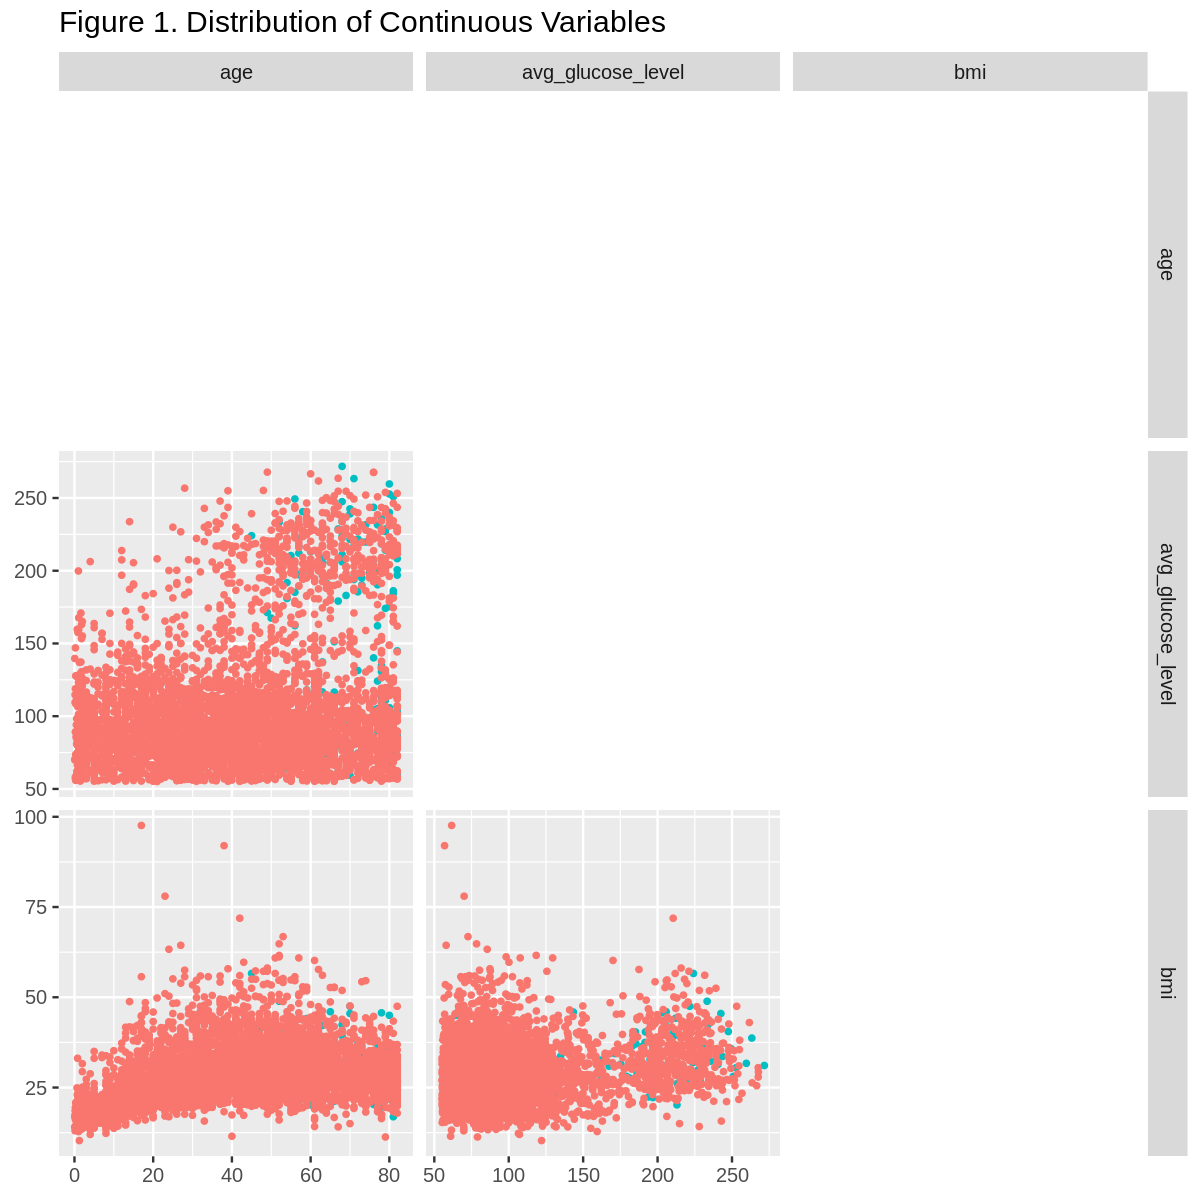

In [17]:
#install.packages("ggplot2")       
#install.packages("GGally")
library("ggplot2")                     
library("GGally")
options(repr.plot.width = 10, repr.plot.height = 10) 
plot_pairs <- data %>% 
  select(age,avg_glucose_level,
         bmi,stroke) %>% 
  ggpairs(columns=1:3,
          mapping = ggplot2::aes(color = stroke),
          upper="blank",
          diag = NULL)+

          labs(color="Stroke")+

          ggtitle("Figure 1. Distribution of Continuous Variables") +

          theme(plot.title = element_text(hjust = 1),
                axis.text.x = element_text(hjust = 1, color = "black",size=10),
                axis.text.y = element_text(hjust = 1, color = "black",size=10),
                legend.position = "bottom")+
        　 
          theme_grey(base_size = 15)

plot_pairs

### Methods

#### Variable Selection

As seen in the graphs above, all the continuous variables correlate with each other and with the target variable. 

Regarding the categorical variables; they all hold personal details of the patient, and we can therefore use all the variables except for `id` as it is simply a unique identifier.

In [18]:
data <- select(data,-c(id))

### Data Analysis

#### Data Spliting

The dataset is split into two segments; training data and test data. We use 75% of the data for training and the other 25% for testing.

In [21]:
library(tidymodels)

In [22]:
options(warn=-1)
set.seed(999)
data_split <- initial_split(data, prop = 0.75, strata = stroke)
data_train <- training(data_split)
data_test <- testing(data_split)

The splitting ratio of 75/25 ensures there is a sufficient amount of samples in both training and testing datasets. Our training data will contain 3682 samples, while our testing data will contain 1227 samples. Both datasets should have the general trend of the original dataset due to the sample size.

In [23]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

data_vfold <- vfold_cv(data_train, v = 5, strata = stroke)

data_recipe <- recipe(stroke ~ ., 
                        data = data_train) %>%
  step_dummy(all_nominal(), -all_outcomes()) %>% 
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

knn_results <- workflow() %>%
  add_recipe(data_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = data_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

x Fold5: model 1/1: Error in apply(weightClass, 1, order, decreasing = TRUE)[1, ]...



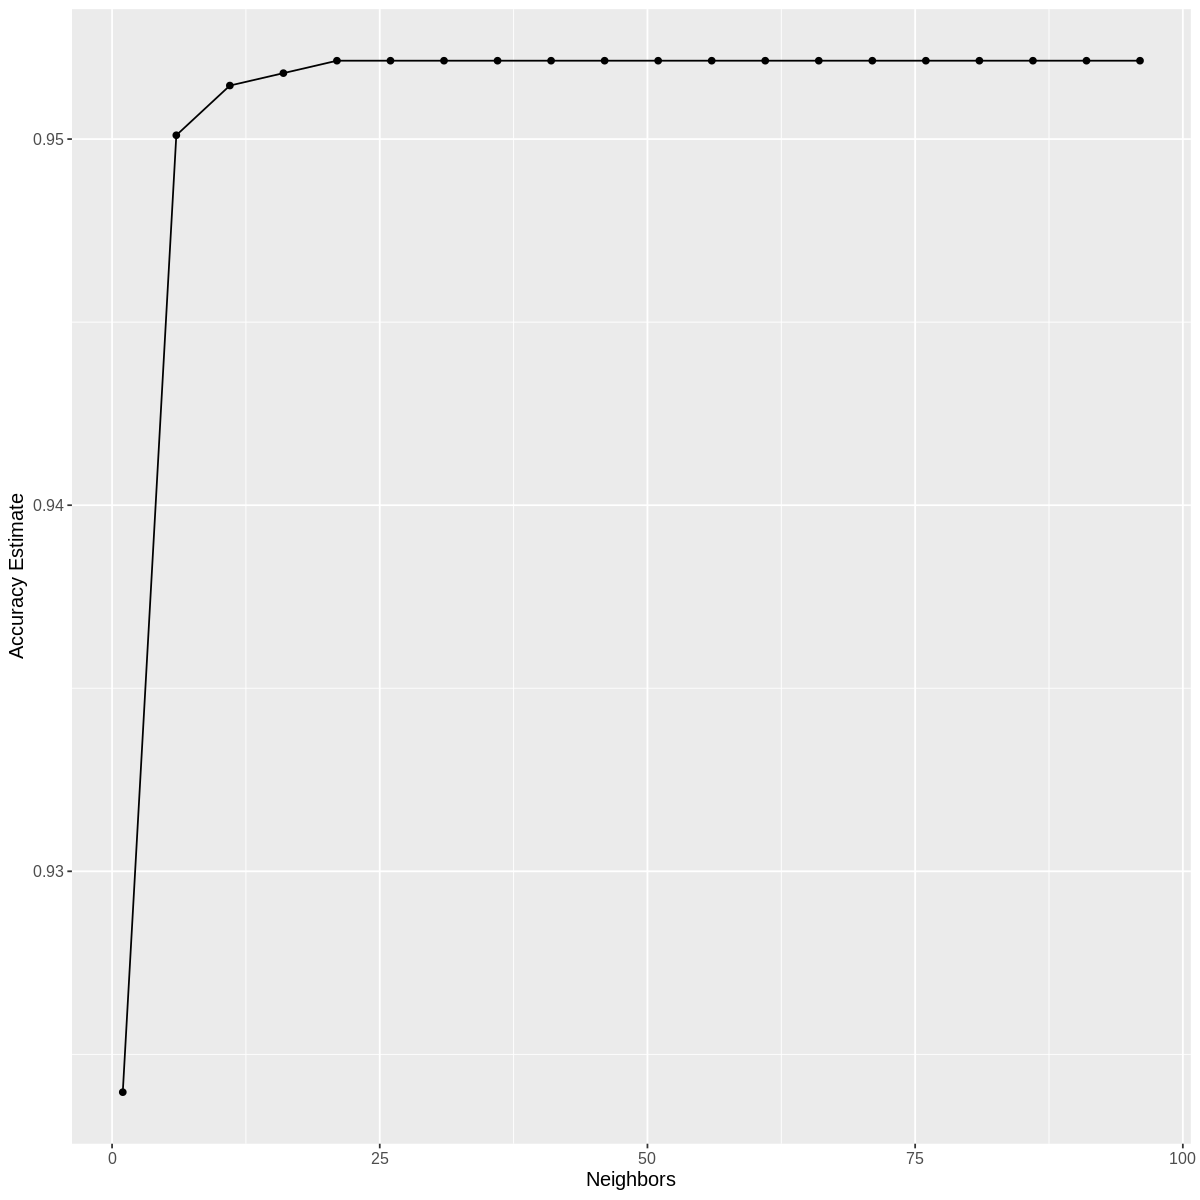

In [24]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

As the K-nearest neighbor is used in our classification analysis, the parameter tuning is applied here to help us select the best value for K, which in-turn gives the model the highest accuracy. To select the optimum value for K, we calculate the accuracies of K values from K=1 to K=100 using the training set with 5-cross validation. For each K value, we randomly divide the training set into 5 segments. We then
calculate the accuracy 5 times, while using a different segment as the test set for each time. Finally, the final accuracy for each K value is calculated by taking the average of the 5 accuracies.

As seen in the graph above, the curve flattens at K=12. Any value greater than 12 will provide the same level of accuracy, but the computational power required will be much higher, which means taking more time to fit the model. Consequently, we chose K=12 for our KNN model.

The continuous variables `age`, `bmi`, and `avg_glucose_level` have different scales. Thus, we will standardize them with the mean as 0 and standard deviation as 1. The categorical variables in the dataset are converted to dummies to fit the data into the model.

In [25]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(data_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = data_train)

The model is specified as knn with K=12 for classification. The model is then fitted into our training set with scaled data.

In [26]:
stroke_test_predictions <- predict(knn_fit, data_test) %>%
  bind_cols(data_test)

stroke_test_predictions %>%
  metrics(truth = stroke, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

patient <- tibble(gender = 'Male', age = 64, hypertension = '0', heart_disease = '0', ever_married = 'Yes', work_type = 'Private', 
                  Residence_type = 'Urban', avg_glucose_level = , bmi = 31, smoking_status = 'formerly smoked')
results <- predict(knn_fit, patient)
results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9608802


ERROR: Error in eval_tidy(xs[[j]], mask): object '' not found


All in all, our model achieves a high accuracy of 96%, which indicates its exceptional ability to predict whether a patient is likely to experience a stroke in their lifetime or not using the variables included in the dataset.

#### Visualization of the Model

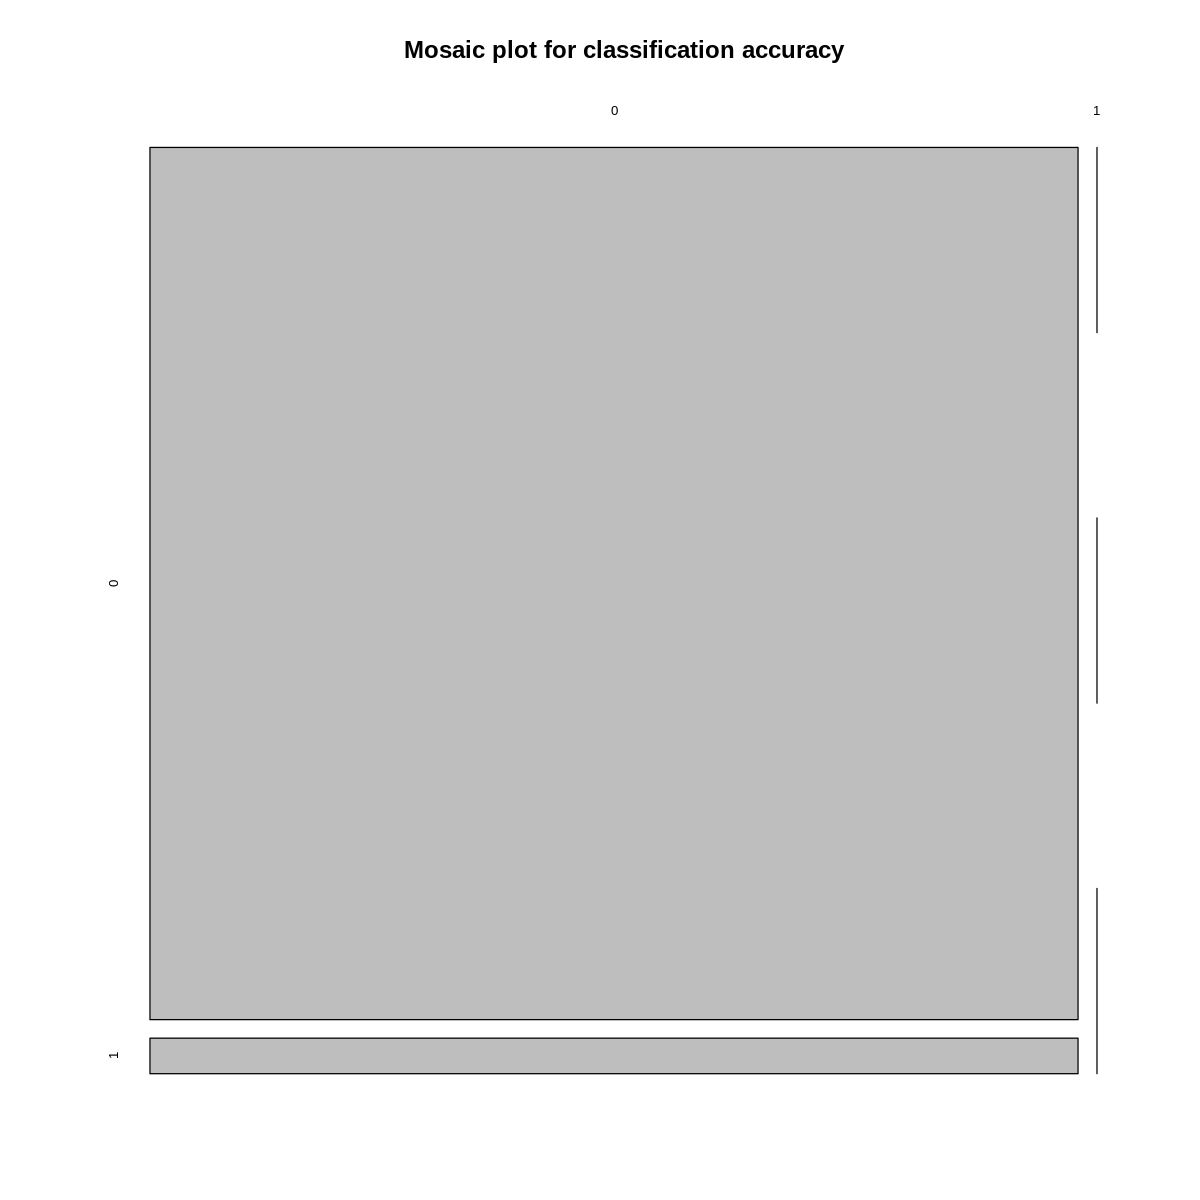

In [27]:
mosaicplot(table(stroke_test_predictions$.pred_class, stroke_test_predictions$stroke), main="Mosaic plot for classification accuracy")

The mosaic diagram, which visualizes the contigency table, shows that there are some patients with stroke symptoms that are being missclassified as patients who are not likely to experience a stroke in their lifetime. False negatives are a serious problem in disease/medical condition detection, and further improvement to the model is needed to safely predict strokes.

## References

CDC. (2017, September 6). Preventing Stroke Deaths. Centers for Disease Control and Prevention. https://www.cdc.gov/vitalsigns/stroke/index.html#:~:text=Almost%20800%2C000%20people%20have%20a

fedesoriano. (2021). Stroke Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Mayo Clinic. (2022, January 20). Stroke. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113

NHS. (2017, October 24). Stroke. National Health Service. https://www.nhs.uk/conditions/stroke/#:~:text=A%20stroke%20is%20a%20serious

WSO. (n.d.). Learn about stroke. World Stroke Organization. Retrieved April 6, 2022, from https://www.world-stroke.org/world-stroke-day-campaign/why-stroke-matters/learn-about-stroke